<a href="https://colab.research.google.com/github/sarahrdk/EscapeEarth/blob/main/Interns/Sarah/Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount google drive to access/write data

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import/Install needed packages 

In [ ]:
import pandas as pd
!pip install lightkurve
import lightkurve as lk


# Functions to open data

In [16]:
import lightkurve as lk
import glob
import os
import pandas as pd

def locate_files(tic,path=None):
    '''
    ~ Locates TESS lightcurve files with filenames formatted from a mast bulk download.~
    REQUIRES: glob
    Args: 
        tic            -(int or str)TESS TIC ID
        path           -(str) path on computer to file(s) location
    Returns:
        list of path strings for all files found with specified tic
    '''
    if path == None: #if only need filename
        fullpath = glob.glob('*{}-*-s_lc.fits'.format(tic)) #to use wildcard*
    else: #user defined path to datafile on their computer
        pathstart = path   
        pathstart = str(pathstart) #make a string in case user forgets to but think that gives an err anyway
        pathend = pathstart +'*{}-*-s_lc.fits'.format(tic) #stitches path & filename
        fullpath= glob.glob(pathend) #to use wildcard* 
    return fullpath


def open_rawdata(fullpath,sector):
    '''
    ~ Opens raw data light curve file objects downloaded to our shared google drive folder~
    REQUIRES: lightkurve as lk
    Args:
        fullpath   -(str) list of path strings for all files found with specified tic
        sector    -(int) sector number for desired data
    Returns:
        lcfs      -(list) list of lightkurve 'lightcurvefile' class objects
    '''
    lcfs = []
    for file in fullpath:
        if len(file)==0:
            print('no files')
        else:
            try:
                lcfile = lk.open(file)
                mystring = str(type(lcfile))
                if mystring[34:-2] == 'TessLightCurveFile':
                    hdr = lcfile.get_header()
                    mysector = hdr['SECTOR']
                    if sector == mysector:
                        lcfs.append(lcfile)
                    else:
                        pass
                else:
                    pass
            except FileNotFoundError:
                pass
    return lcfs

# Load in starting data

In [4]:
# tic ids for subsample
subsample_tics = [7582594, 7582633, 7620704, 7618785, 7584049]
# path to raw data
raw_data_path = '/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/'

# open data
paths2files = locate_files(subsample_tics[1],raw_data_path) #locate filename given tic id 
subsample_data = open_rawdata(paths2files,sector=14) #open the lightcurvefile
print('Initial function output data type:',type(subsample_data))

Initial function output data type: <class 'list'>


In [35]:
list1 = []
for count, i in enumerate(subsample_tics):
  print(i)
  print(count)
  print(raw_data_path)
  paths2files = locate_files(i,raw_data_path) #locate filename given tic id 
  print(paths2files)
  #saveguard against missing files  
  if len(paths2files)==0: #if no files exist go to next target in for loop    
    pass  
  else: 
    subsample_data = open_rawdata(paths2files,sector=14) #open the lightcurvefile
    print(subsample_data)
    newclass = subsample_data[0].PDCSAP_FLUX
    hello = newclass.remove_outliers(sigma = 3)
    print(type(hello))
    list1.append(hello)

7582594
0
/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/
[]
7582633
1
/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/
['/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/tess2019198215352-s0014-0000000007582633-0150-s_lc.fits']
[TessLightCurveFile(TICID: 7582633)]
<class 'lightkurve.lightcurve.TessLightCurve'>
7620704
2
/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/
['/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/tess2019198215352-s0014-0000000007620704-0150-s_lc.fits']
[TessLightCurveFile(TICID: 7620704)]
<class 'lightkurve.lightcurve.TessLightCurve'>
7618785
3
/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/
['/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/tess2019198215352-s0014-0000000007618785-0150-s_lc.fits']
[TessLightCurveFile(TICID: 7618785)]
<class 'lightkurve.lightcurve.TessLightCurve'>
7584049
4
/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/
[]


# Test on a single target

Initial data type: <class 'lightkurve.lightcurve.TessLightCurve'>


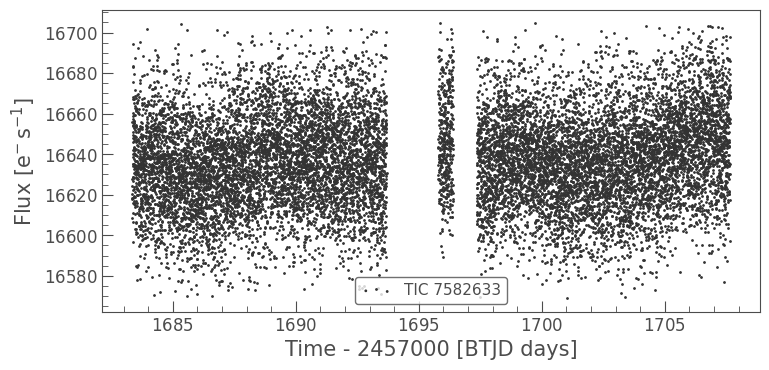

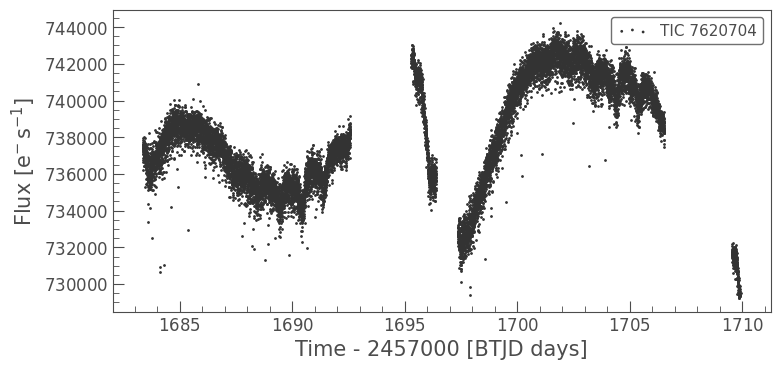

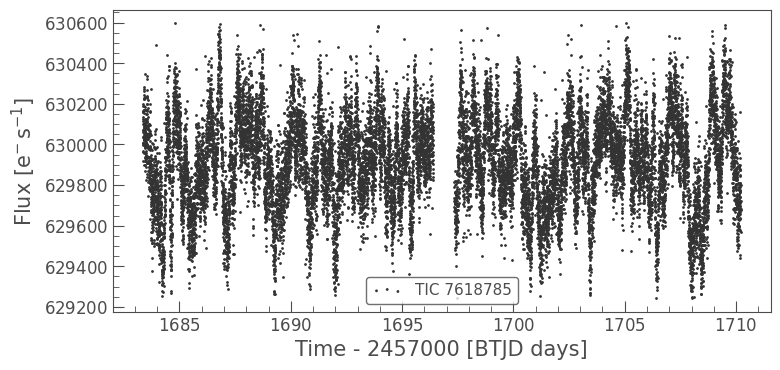

In [36]:
# examine input data

print('Initial data type:',type(list1[0])) #check inital class object type to see allowed methods
for i in list1:
  i.scatter() #visualize original data

# Apply class method to clean single target

In [6]:
# change/select data type to necessary class object in order to use class method

pdcsap_data = subsample_data[0].PDCSAP_FLUX #change class object type
print('original data type:',type(subsample_data[0])) #print to see change in class object type
print('new data type:',type(pdcsap_data)) #verify class object change

original data type: <class 'lightkurve.lightcurvefile.TessLightCurveFile'>
new data type: <class 'lightkurve.lightcurve.TessLightCurve'>


In [ ]:
# apply class method


bin_data = pdcsap_data.bin() #apply method
bin_data.plot() #visualize the effect of method
print('type:',type(bin_data)) #check for output data type

In [ ]:
# show how to use any helpful args

bin_data2 = pdcsap_data.bin(bins=27) #see how args change output data
bin_data2.plot() #visualize effect of arg change

In [9]:
# examine output data

print('Output data type:',type(bin_data2)) #NOTE: your output data type should be 'TessLightCurve' or 'LightCurve'

Output data type: <class 'lightkurve.lightcurve.TessLightCurve'>


# Apply method iteratively to all targets

In [ ]:
for target in subsample_tics:
  #open data
  paths = locate_files(target,raw_data_path)
  original_data = open_rawdata(paths,sector=14)

  #saveguard against missing files
  if len(original_data)==0: #if no files exist go to next target in for loop
    pass
  else: #if files exist proceed

    #format data (class object type)
    new_data = original_data[0].PDCSAP_FLUX #index into orignal_data b/c its a list
    #verify class object change
    print('class object change:',type(original_data[0]),'changed to',type(new_data))

    #apply method
    cleaned_data = new_data.bin(bins=27)
    #verify cleaned data looks different (or save it)
    cleaned_data.plot()

In [ ]:
# BONUS work: write this new data to a file so we can open cleaned data directly
# instead of opening raw data, cleaning it, then running analysis code on it
# Tip: Similar to above, test your code on one target first, then edit code to 
# work in a for loop
